In [1]:
using PyPlot;
using Random;
using Statistics;

In [2]:
include("src/utils.jl")

parametric2ellipse_coords (generic function with 1 method)

# Prob 14.1 #

Given a function $\tilde{f} : \mathbf{R}^n \rightarrow \mathbf{R}$ and its corresponding classifier $\hat{f}(x) = \mathbf{sign}(\tilde{f}(x))$ we can define the RMS error over the data set as 

$$\sigma^2 = \frac{1}{N} \sum_{i=1}^N \left(\tilde{f}(x_i) - y_i\right)^2$$

where $y_i \in \{-1,1\}$. Similarly, we can define the prediction error as 

$$err = \frac{1}{N} \sum_{i=1}^N \mathbf{1}\{\hat{f}(x_i) \ne y_i\}$$

As the graphs below show, we always have $\mathbf{1}\{\hat{f}(x_i) \ne y_i\} \le \left(\tilde{f}(x_i) - y_i\right)^2$ from which it follows immediately that 

$$err \le \sigma^2$$


In [3]:
x = range(-4,stop=4.0, length=1000);
indicator1 = (x .> 0);
indicator2 = (x .<0 );
squareError1 = (x .+ 1) .^2;
squareError2 = (x .- 1) .^2;

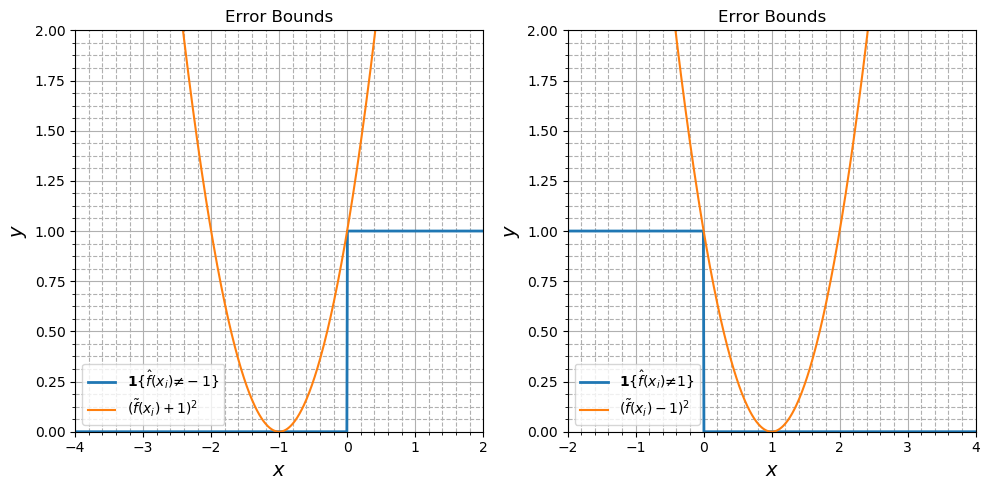

In [4]:
figure(figsize=(10,5));

subplot(121)
plot(x, indicator1, linewidth=2, label=L"$\mathbf{1}\{\hat{f}(x_i)\ne -1\}$");
plot(x, squareError1, label=L"$(\tilde{f}(x_i) + 1)^2$")

legend();
title("Error Bounds");
xlabel(L"$x$", fontsize=14);
ylabel(L"$y$", fontsize=14);

gca()[:set_xlim]([-4,2]);
gca()[:set_ylim]([0,2]);

grid(true, which="major");
grid(true, which="minor",linestyle="--");
PyPlot.minorticks_on();


subplot(122);
plot(x, indicator2, linewidth=2, label=L"$\mathbf{1}\{\hat{f}(x_i)\ne 1\}$");
plot(x, squareError2, label=L"$(\tilde{f}(x_i) - 1)^2$");

legend();
title("Error Bounds");
xlabel(L"$x$", fontsize=14);
ylabel(L"$y$", fontsize=14);

gca()[:set_xlim]([-2,4]);
gca()[:set_ylim]([0,2]);

grid(true, which="major");
grid(true, which="minor",linestyle="--");
PyPlot.minorticks_on();

tight_layout();

# Prob 14.2 #

The simplest classifier where the response variable is such that $y_i \in \{-2,-1,0,1,2\}$ is just a least squares classifier fit to the data. The prediction is then $\hat{y}_i = \arg \min |y_i - \hat{f}(x_i)|$

# Prob 14.5 #

In [5]:
x = range(-1,stop=1, length=2000);
y = 2 * ((-0.5 .<= x .< 0.1) + (0.5 .<= x)) .- 1;

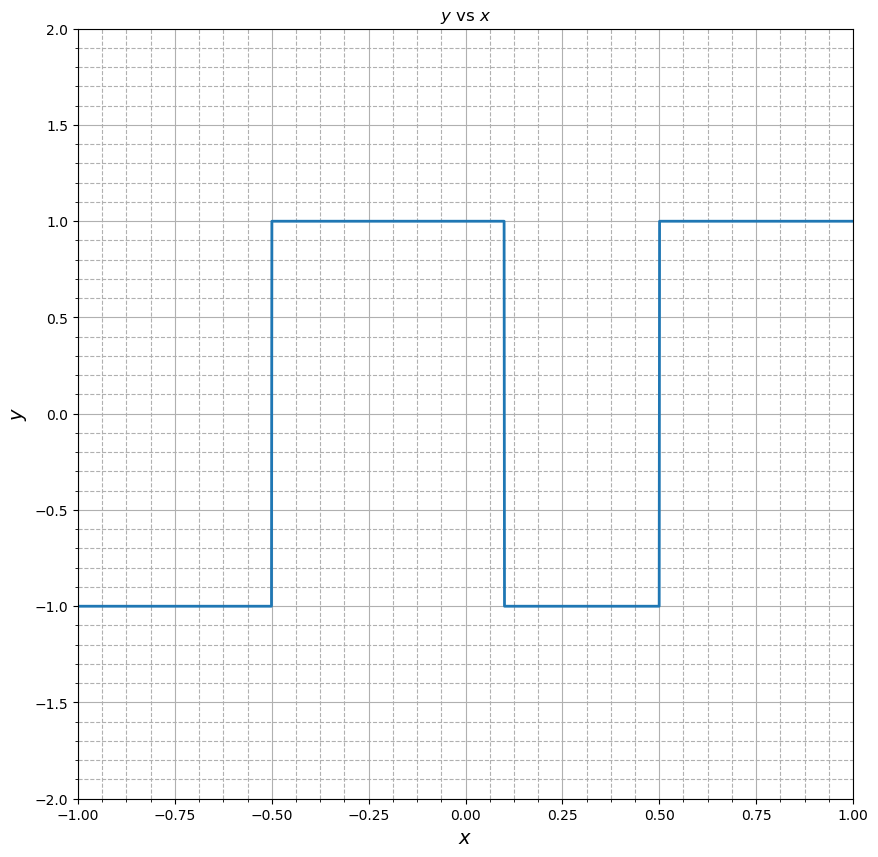

In [6]:
figure(figsize=(10,10));

plot(x, y, linewidth=2, label=L"$y$");
title(L"$y$ vs $x$");
xlabel(L"$x$", fontsize=14);
ylabel(L"$y$", fontsize=14);

xlim([-1,1]);
ylim([-2,2]);

grid(true, which="major");
grid(true, which="minor",linestyle="--");
PyPlot.minorticks_on();

In [7]:
max_deg = 8;
rmse_train = zeros(max_deg + 1);
error_rate_train = zeros(max_deg + 1);

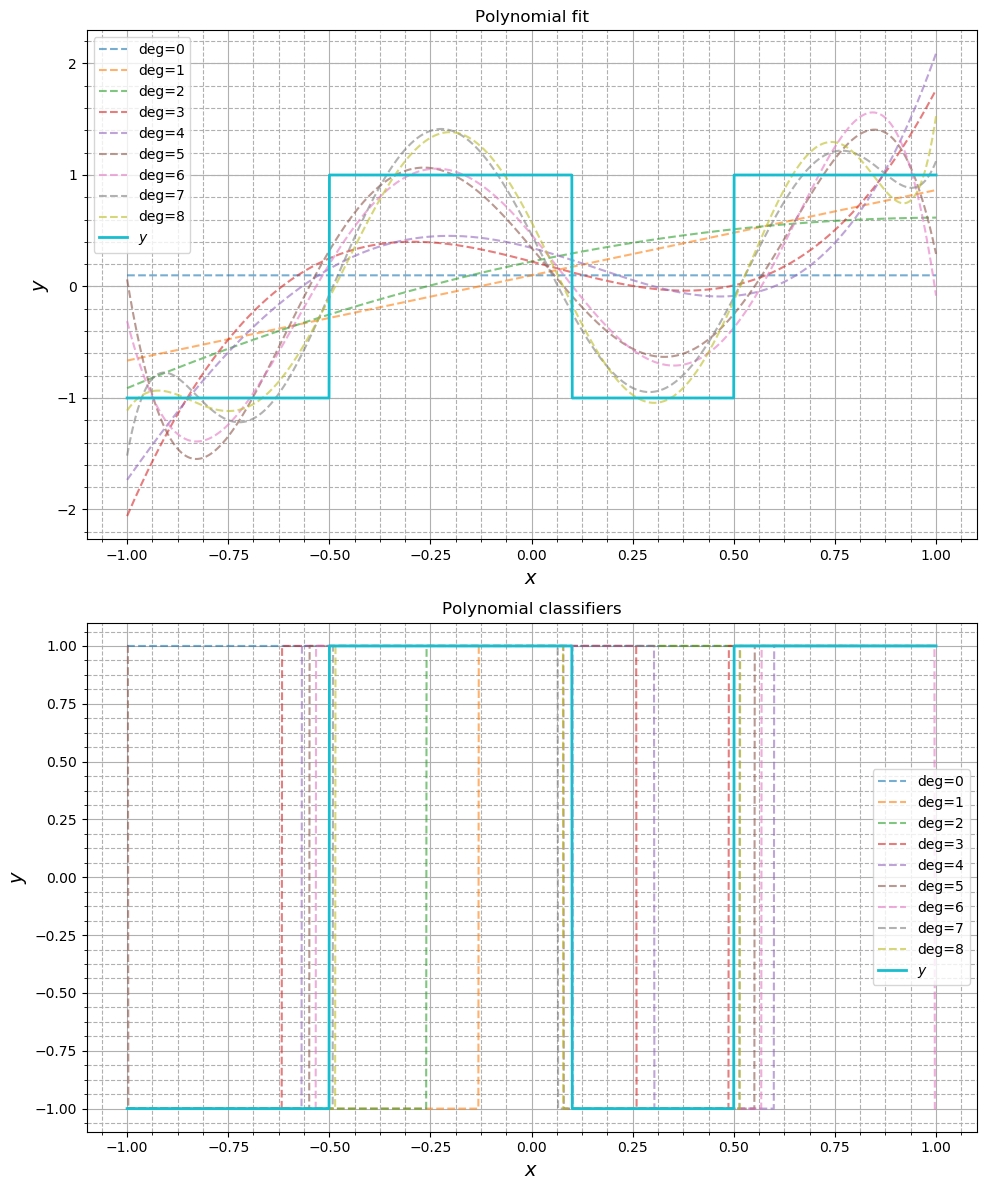

In [8]:
figure(figsize=(10,12));

for i = 0:max_deg
    A = vandermonde(x, i);
    theta = A \ y;

    pred = A * theta;
    binarized_pred = sign.(pred);
    
    subplot(211);
    plot(x, pred, "--", alpha=0.6, label=string("deg=", i));
    
    subplot(212);
    plot(x, binarized_pred, "--", alpha=0.6, label=string("deg=", i));

    rmse_train[i+1] = rmse(A * theta, y=y);
    error_rate_train[i+1] = Statistics.mean(0.5 * abs.(binarized_pred - y));
end

subplot(211);
plot(x, y, linewidth=2, label=L"$y$");

legend();
title("Polynomial fit");
xlabel(L"$x$", fontsize=14);
ylabel(L"$y$", fontsize=14);

grid(true, which="major");
grid(true, which="minor",linestyle="--");
PyPlot.minorticks_on();

subplot(212);
plot(x, y, linewidth=2, label=L"$y$");

legend();
title("Polynomial classifiers");
xlabel(L"$x$", fontsize=14);
ylabel(L"$y$", fontsize=14);

grid(true, which="major");
grid(true, which="minor",linestyle="--");
PyPlot.minorticks_on();

tight_layout();

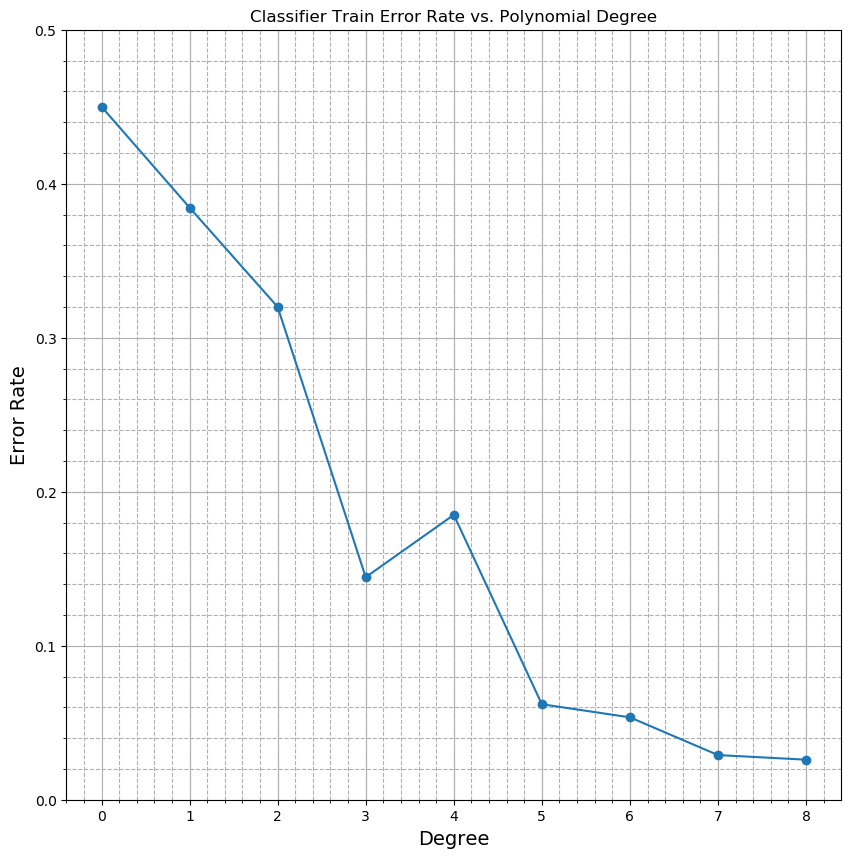

In [9]:
figure(figsize=(10,10));

plot(error_rate_train, marker="o");

title("Classifier Train Error Rate vs. Polynomial Degree");
xlabel("Degree", fontsize=14);
ylabel("Error Rate", fontsize=14);
ylim([0, 0.5]);

grid(true, which="major");
grid(true, which="minor",linestyle="--");
PyPlot.minorticks_on();

In [10]:
perfect_classifier = (x .+ 0.5) .* (x .- 0.1) .* (x .- 0.5);
A = vandermonde(x, 3);
theta = A \ y;
pred_deg3 = A * theta;

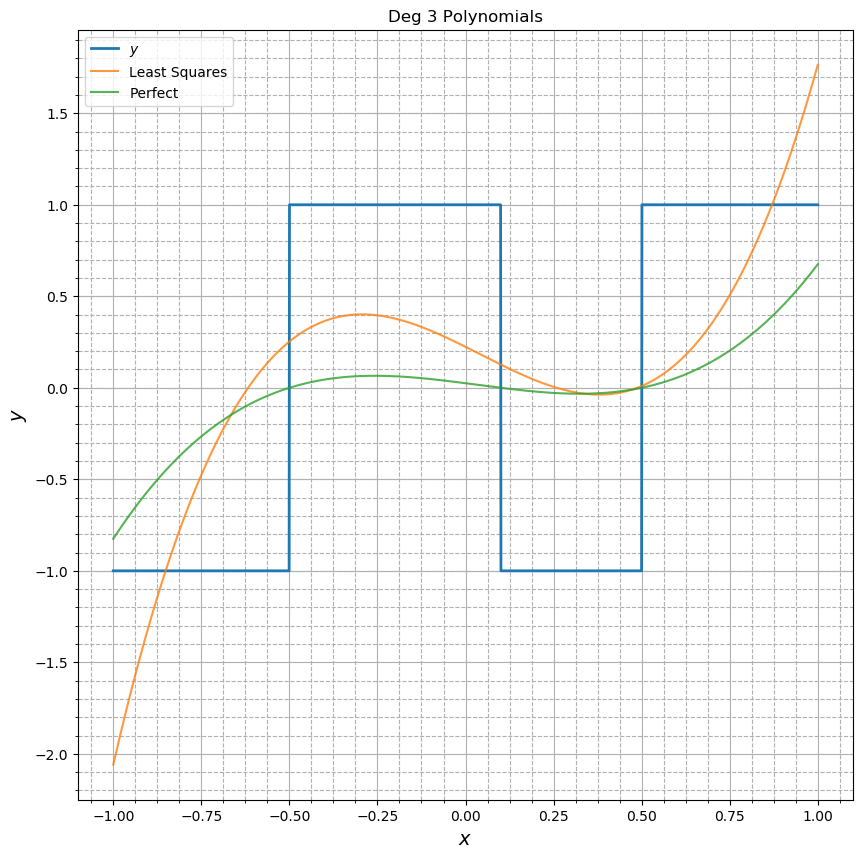

In [11]:
figure(figsize=(10,10))
plot(x, y, linewidth=2, label=L"$y$");
plot(x, pred_deg3, alpha=0.8, label="Least Squares");
plot(x, perfect_classifier, alpha=0.8, label="Perfect");

legend();
title("Deg 3 Polynomials");
xlabel(L"$x$", fontsize=14);
ylabel(L"$y$", fontsize=14);

grid(true, which="major");
grid(true, which="minor",linestyle="--");
PyPlot.minorticks_on();

# Prob 14.6 #

In [12]:
Random.seed!(1);

x1 = randn(200);
x2 = randn(200);
label = (x1 .* x2) .> 0;

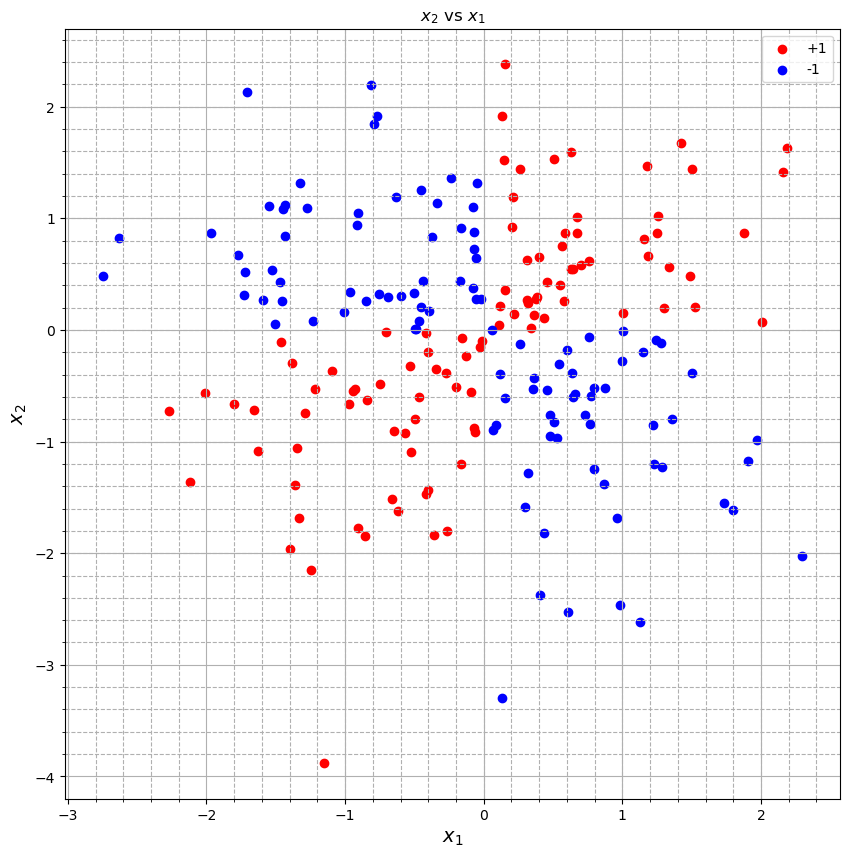

In [13]:
figure(figsize=(10,10));

scatter(x1[label], x2[label], color="red", label="+1");
scatter(x1[.!label], x2[.!label], color="blue", label="-1");

legend();
title(L"$x_2$ vs $x_1$");
xlabel(L"$x_1$", fontsize=14);
ylabel(L"$x_2$", fontsize=14);

grid(true, which="major");
grid(true, which="minor",linestyle="--");
PyPlot.minorticks_on();

In [14]:
A = hcat(ones(200), x1, x2, x1.^2, x1.*x2, x2.^2);
y = 2 * label .- 1;
theta = A \ y;

pred = A * theta;
binarized_pred = sign.(pred);
error_rate = Statistics.mean(0.5*abs.(binarized_pred - y));

println("Error Rate : $error_rate");
print("Optimal Polynomial fit has theta : $theta")

Error Rate : 0.05
Optimal Polynomial fit has theta : [0.0153132, 0.0546497, 0.00922692, 0.00225764, 0.578075, -0.0179875]

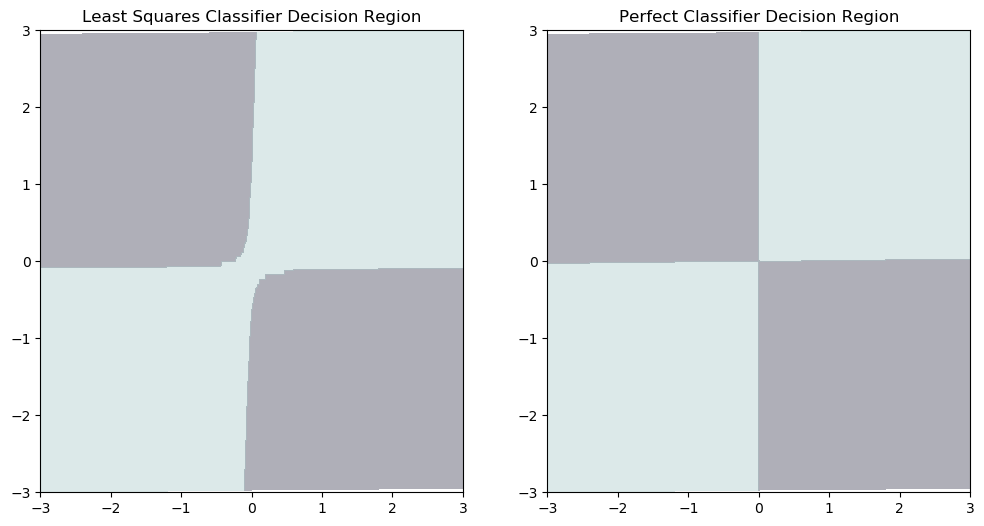

In [15]:
n = 1000;
m = 100
t = range(-3,stop=3.0, length=n);
x = repeat(t, m, 1);
y = repeat(t, 1, m)' .+ 0.  ;        # Stupid decision by Julia devs to make transpose return a view
y = reshape(y, m*n);

A_plot = hcat(ones(m * n), x, y, x.^2, x.*y, y.^2);
pred = A_plot * theta;
binarized_pred = sign.(pred);

X = reshape(x, (n, m));
Y = reshape(y, (n, m));

figure(figsize=(12,6));

subplot(121);
contourf(X, Y, reshape(binarized_pred, (n, m)), 0, alpha=0.4, cmap="bone")
title("Least Squares Classifier Decision Region");

subplot(122);
contourf(X, Y, sign.(X.*Y), 0, alpha=0.4, cmap="bone");
title("Perfect Classifier Decision Region");
